# Analise exploratória do Dataframe Bank (http://archive.ics.uci.edu/ml/datasets/Bank+Marketing) 

1. Do que se trata?
Base de dados com o perfil dos bons e maus pagadores de empréstimo.
2. Qual o objetivo?
Entender qual o perfil dos bons e maus pagadores de empréstimo.
4. Gerar todos os gráficos com nomes das colunas.
5. O que a análise exploratória mostra?

## Descrição das bibliotecas

- pandas: Biblioteca de manipulação de dados.
- seaborn: Biblioteca baseada na matplotlib para visualização de dados.
- numpy: Biblioteca usado para cálculo matemático.
- matplotlib: Biblioteca usada para plotar gráficos 2D.
- scipy: Biblioteca usada para calculos estatísticos.

In [1]:
# Importar bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn import tree, neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import Normalizer, MinMaxScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier

plt.rcParams['figure.figsize'] = [16, 10]
pd.set_option('display.max_columns', None)

In [2]:
# Importar arquivo CSV com Pandas
df_csv = pd.read_csv("dados/bank.csv", sep = ";")

In [3]:
# Primeiros 5 registros do dataframe
df_csv.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# Quantidade de linhas e colunas do Dataframe - np é da bilbioteca numpy
np.shape(df_csv)

(4521, 17)

In [5]:
# Remover colunas
df_csv = df_csv.drop(columns=['job'])
df_csv = df_csv.drop(columns=['default'])
df_csv = df_csv.drop(columns=['contact'])
df_csv = df_csv.drop(columns=['day'])
df_csv = df_csv.drop(columns=['month'])
df_csv = df_csv.drop(columns=['campaign'])
df_csv = df_csv.drop(columns=['poutcome'])

In [6]:
# Primeiros 5 registros do dataframe
df_csv.head()

,age,marital,education,balance,housing,loan,duration,pdays,previous,y
0,30,married,primary,1787,no,no,79,-1,0,no
1,33,married,secondary,4789,yes,yes,220,339,4,no
2,35,single,tertiary,1350,yes,no,185,330,1,no
3,30,married,tertiary,1476,yes,yes,199,-1,0,no
4,59,married,secondary,0,yes,no,226,-1,0,no


In [7]:
# Realiza a contagem de valores NaN em cada coluna
print(df_csv.isnull().sum())

age          0
marital      0
education    0
balance      0
housing      0
loan         0
duration     0
pdays        0
previous     0
y            0
dtype: int64


In [8]:
# Descrição detalhada das informações do Dataframe
# a função 'describe()' desconsidera os valores NaN (nulos)
df_csv.describe()

,age,balance,duration,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,39.766645,0.542579
std,10.576211,3009.638142,259.856633,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,871.000000,25.000000


In [9]:
# Mostra quantidade de valores diferentes
marital = df_csv['marital'].value_counts()

In [10]:
df_csv['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [11]:
df_csv['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [12]:
df_csv['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [13]:
df_csv['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [14]:
conjugue = {'divorced': 0, 'single': 1, 'married': 2}
df_csv['conjugue'] = df_csv['marital'].map(conjugue)

educacao = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df_csv['educacao'] = df_csv['education'].map(educacao)

habitacao = {'no': 0, 'yes': 1}
df_csv['habitacao'] = df_csv['housing'].map(habitacao)

emprestimo = {'no': 0, 'yes': 1}
df_csv['emprestimo'] = df_csv['loan'].map(emprestimo)

resultado = {'no': 0, 'yes': 1}
df_csv['resultado'] = df_csv['y'].map(resultado)

In [15]:
# Organiza as colunas
columnsTitles = ['age', 'marital', 'conjugue', 'education', 'educacao', 'housing', 'habitacao', 'loan', 'emprestimo', 'balance', 'duration', 'pdays', 'previous', 'y', 'resultado']
df_csv = df_csv.reindex(columns = columnsTitles)

# Primeiros 5 registros do dataframe
df_csv.head()

,age,marital,conjugue,education,educacao,housing,habitacao,loan,emprestimo,balance,duration,pdays,previous,y,resultado
0,30,married,2,primary,1,no,0,no,0,1787,79,-1,0,no,0
1,33,married,2,secondary,2,yes,1,yes,1,4789,220,339,4,no,0
2,35,single,1,tertiary,3,yes,1,no,0,1350,185,330,1,no,0
3,30,married,2,tertiary,3,yes,1,yes,1,1476,199,-1,0,no,0
4,59,married,2,secondary,2,yes,1,no,0,0,226,-1,0,no,0


In [16]:
# Remover colunas
arquivo_csv = df_csv.drop(columns=['marital', 'education', 'housing', 'loan', 'y'])

arquivo_csv.head()

,age,conjugue,educacao,habitacao,emprestimo,balance,duration,pdays,previous,resultado
0,30,2,1,0,0,1787,79,-1,0,0
1,33,2,2,1,1,4789,220,339,4,0
2,35,1,3,1,0,1350,185,330,1,0
3,30,2,3,1,1,1476,199,-1,0,0
4,59,2,2,1,0,0,226,-1,0,0


In [17]:
# Exclui coluna
#df = arquivo_csv.drop(columns=['resultado'])

In [18]:
arquivo_csv.values[:, 0:9]

array([[ 30,   2,   1, ...,  79,  -1,   0],
       [ 33,   2,   2, ..., 220, 339,   4],
       [ 35,   1,   3, ..., 185, 330,   1],
       ...,
       [ 57,   2,   2, ..., 151,  -1,   0],
       [ 28,   2,   2, ..., 129, 211,   3],
       [ 44,   1,   3, ..., 345, 249,   7]], dtype=int64)

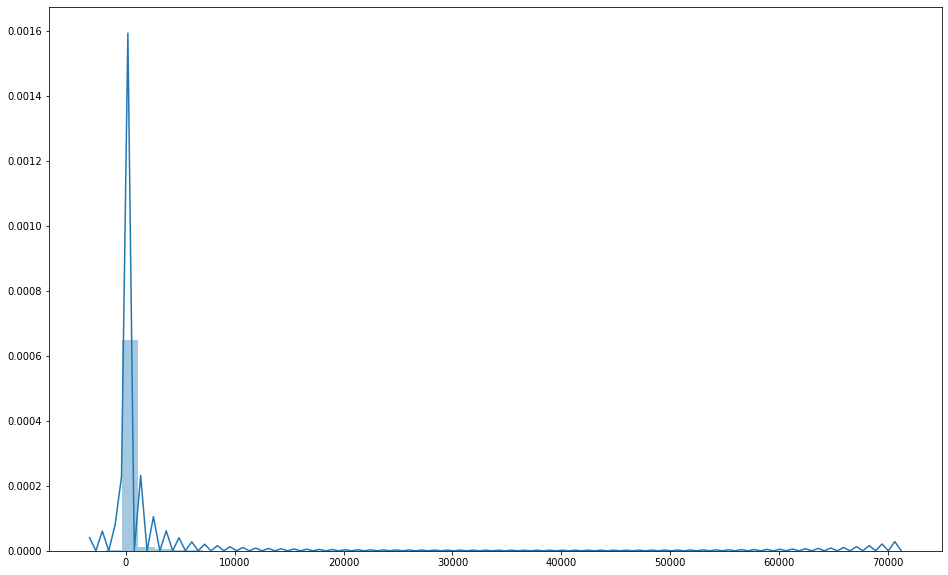

In [19]:
sns.distplot(arquivo_csv)
# plt.hist(arquivo_csv['balance'])

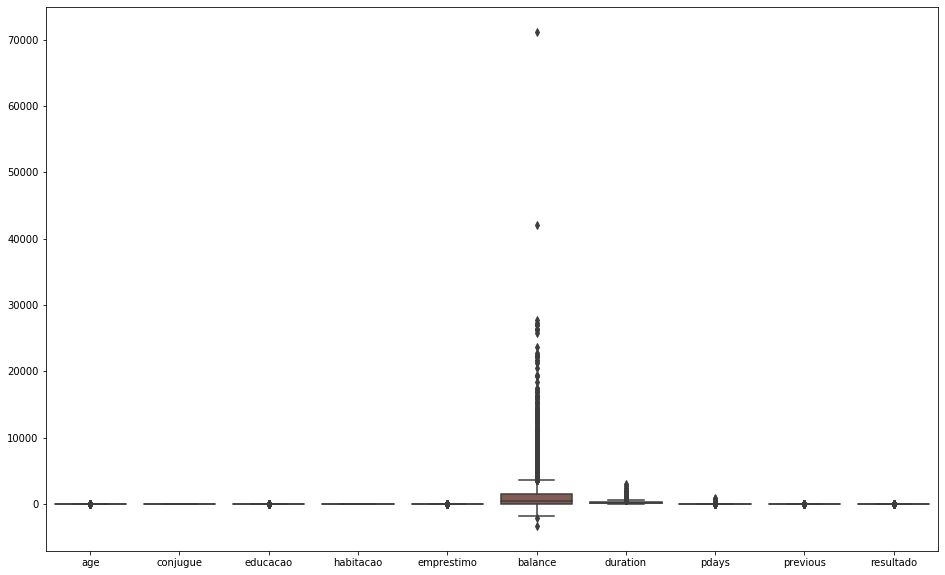

In [20]:
# boxplot
sns.boxplot(data = arquivo_csv)

In [21]:
arquivo_csv = arquivo_csv.loc[(arquivo_csv['balance'] <= 40000)]
arquivo_csv = arquivo_csv.loc[(arquivo_csv['balance'] < 0)]
#arquivo_csv = arquivo_csv.loc[(arquivo_csv['balance'] <= 40000)]

In [22]:
#normaliza os dados
scaler = Normalizer().fit(arquivo_csv)
normalizedX = scaler.transform(arquivo_csv)

In [23]:
print("Resumo dos dados modificados")
np.set_printoptions(precision=5)
print(normalizedX)

Resumo dos dados modificados
[[ 0.01677  0.00112  0.00056 ... -0.00056  0.       0.     ]
 [ 0.00687  0.00042  0.00042 ...  0.07053  0.00083  0.     ]
 [ 0.02496  0.00071  0.00214 ...  0.2353   0.00071  0.     ]
 ...
 [ 0.1695   0.00595  0.00595 ... -0.00297  0.       0.     ]
 [ 0.02406  0.00172  0.00172 ...  0.18128  0.00258  0.     ]
 [ 0.03625  0.00082  0.00247 ...  0.20513  0.00577  0.     ]]


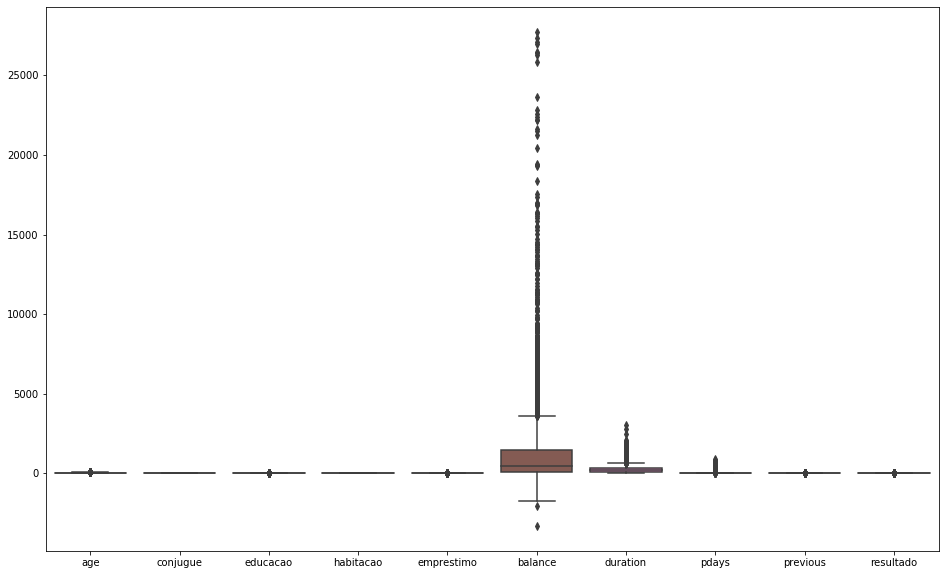

In [24]:
# gráfico de dispersão
#sns.catplot(data = df)
#sns.boxplot(normalizedX)
sns.boxplot(data = arquivo_csv)

### Correlação - medida se associação entre duas ou mais variáveis
- 0,9 a 1 positivo ou negativo indica uma correlação muito forte.
- 0,7 a 0,9 positivo ou negativo indica uma correlação forte.
- 0,5 a 0,7 positivo ou negativo indica uma correlação moderada.
- 0,3 a 0,5 positivo ou negativo indica uma correlação fraca.
- 0 a 0,3 positivo ou negativo indica uma correlação desprezível.

In [25]:
# correlação entre 'balance' e 'age'
#df['balance'].corr(df['age'])

# correlação do dataframe
arquivo_csv.corr()

,age,conjugue,educacao,habitacao,emprestimo,balance,duration,pdays,previous,resultado
age,1.000000,0.123566,-0.198970,-0.193542,-0.011079,0.081226,-0.002274,-0.008729,-0.003380,0.045257
conjugue,0.123566,1.000000,-0.085789,0.027770,0.014458,0.025008,-0.035253,-0.009848,-0.001986,-0.061136
educacao,-0.198970,-0.085789,1.000000,-0.031314,0.016092,0.042724,-0.003256,0.006874,0.027318,0.050271
habitacao,-0.193542,0.027770,-0.031314,1.000000,0.018242,-0.044680,0.015630,0.116725,0.038471,-0.104899
emprestimo,-0.011079,0.014458,0.016092,0.018242,1.000000,-0.074057,-0.005040,-0.031165,-0.022176,-0.070590
balance,0.081226,0.025008,0.042724,-0.044680,-0.074057,1.000000,-0.015386,0.013897,0.031407,0.022723
duration,-0.002274,-0.035253,-0.003256,0.015630,-0.005040,-0.015386,1.000000,0.010340,0.018049,0.401098
pdays,-0.008729,-0.009848,0.006874,0.116725,-0.031165,0.013897,0.010340,1.000000,0.577538,0.104029
previous,-0.003380,-0.001986,0.027318,0.038471,-0.022176,0.031407,0.018049,0.577538,1.000000,0.116669
resultado,0.045257,-0.061136,0.050271,-0.104899,-0.070590,0.022723,0.401098,0.104029,0.116669,1.000000


In [26]:
#divisao de dados atributos e classe
x = arquivo_csv.values[:, 0:9]
y = arquivo_csv.values[:, 9]

#usando o metodo para fazer uma unica divisao dos dados
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

#criando diferentes arvores
np.random.seed(1)
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, random_state = 10)
np.random.seed(1)
clf2 = tree.DecisionTreeClassifier(max_depth = 15, random_state = 10)

clf = clf.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)

print("Acuracia de trainamento clf: %0.3f" %  clf.score(X_train, y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(X_test, y_test))

print("Acuracia de trainamento clf2: %0.3f" %  clf2.score(X_train, y_train))
print("Acuracia de teste clf2: %0.3f" %  clf2.score(X_test, y_test))

Acuracia de trainamento clf: 0.939
Acuracia de teste clf: 0.889
Acuracia de trainamento clf2: 0.988
Acuracia de teste clf2: 0.863


Criando grafios de caixa da distribuicao das classes


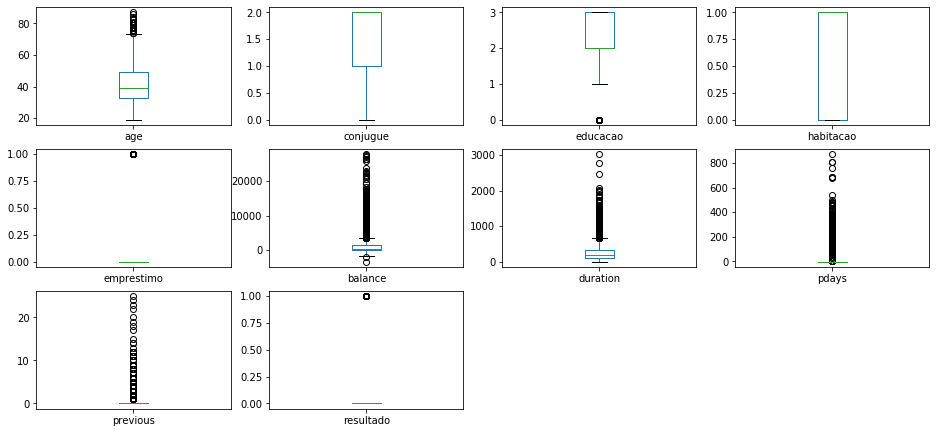

In [27]:
print("Criando grafios de caixa da distribuicao das classes")
arquivo_csv.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False)
plt.show()

Criando histogramas dos dados por classes


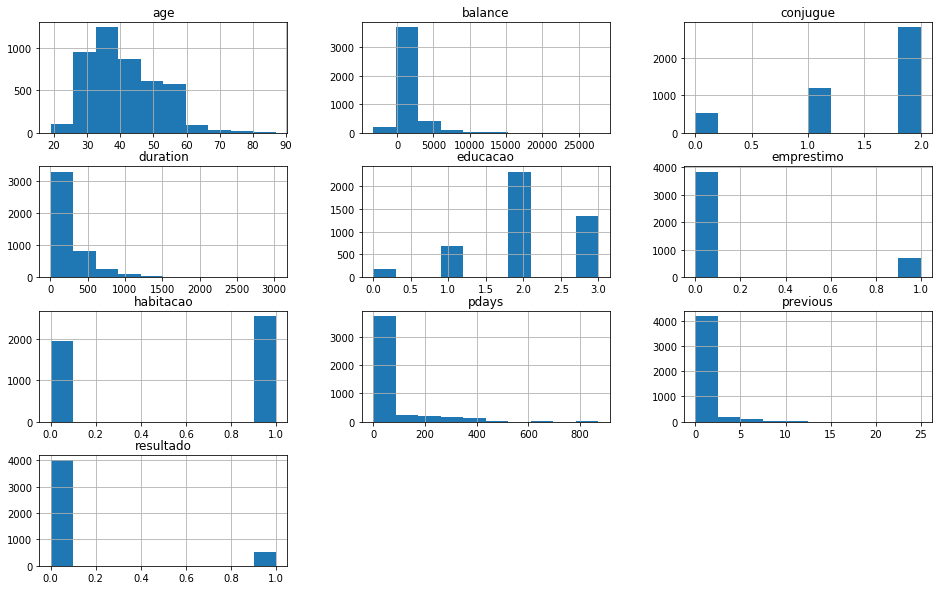

In [28]:
print("Criando histogramas dos dados por classes")
arquivo_csv.hist()
plt.show()

Criando graficos de dispersao dos dados com paleta de cores


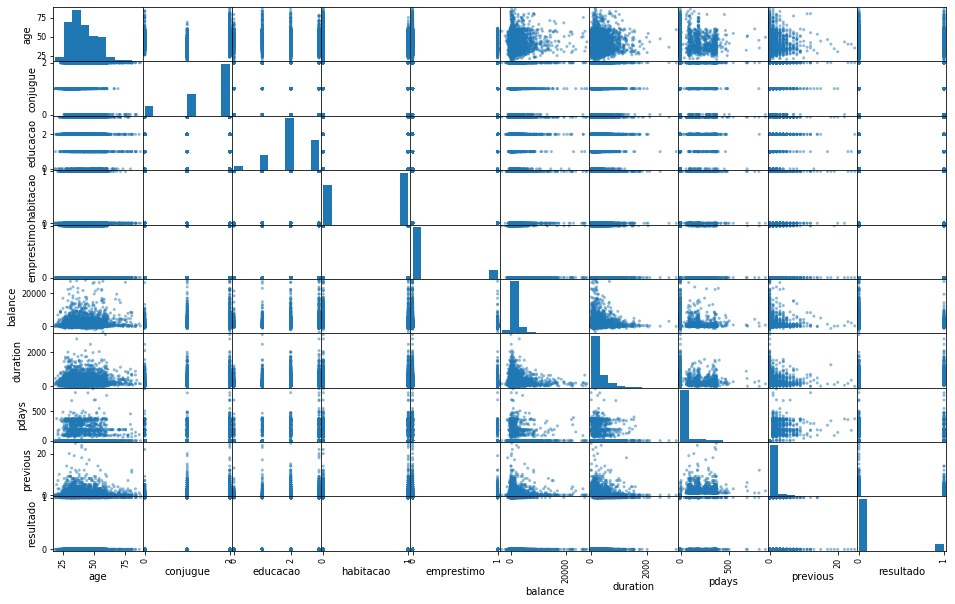

In [29]:
print("Criando graficos de dispersao dos dados com paleta de cores")
#colors_palette = {'no': 'red', 'yes': 'green'}
#colors = [colors_palette[c] for c in arquivo_csv['resultado']]
#pd.plotting.scatter_matrix(arquivo_csv, c = colors_palette)
pd.plotting.scatter_matrix(arquivo_csv)
#plt.savefig('tste_fig')
plt.show()

In [30]:
#usando o metodo para fazer uma unica divisao dos dados
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(5)

clf = clf.fit(x_train, y_train)

print("Acuracia de trainamento clf: %0.3f" %  clf.score(x_train, y_train))
print("Acuracia de teste clf: %0.3f" %  clf.score(x_test, y_test))

Acuracia de trainamento clf: 0.901
Acuracia de teste clf: 0.879


In [31]:
#realizando a selecão de atributos numericos para normalizacao MinMax
num_cols = arquivo_csv.columns[arquivo_csv.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
min_max_scaler = MinMaxScaler()
arquivo_csv[num_cols] = min_max_scaler.fit_transform(arquivo_csv[num_cols])

# Get dummy variables for categorical vars
data_w_dummies = pd.get_dummies(arquivo_csv, prefix_sep = '_', drop_first = True)

# X head
print(data_w_dummies.head())

        age  conjugue  educacao  habitacao  emprestimo   balance  duration  \
0  0.161765       1.0  0.333333        0.0         0.0  0.164272  0.024826   
1  0.205882       1.0  0.666667        1.0         1.0  0.260968  0.071500   
2  0.235294       0.5  1.000000        1.0         0.0  0.150196  0.059914   
3  0.161765       1.0  1.000000        1.0         1.0  0.154255  0.064548   
4  0.588235       1.0  0.666667        1.0         0.0  0.106713  0.073486   

      pdays  previous  resultado  
0  0.000000      0.00        0.0  
1  0.389908      0.16        0.0  
2  0.379587      0.04        0.0  
3  0.000000      0.00        0.0  
4  0.000000      0.00        0.0  


In [32]:
#criando diferentes RNAs
mlp1 = MLPClassifier(hidden_layer_sizes = ([10]))
np.random.seed(1)
mlp2 = MLPClassifier(hidden_layer_sizes = (3, 3), random_state = 1)
mlp3 = MLPClassifier(hidden_layer_sizes = ([5, 5, 2]))

mlp1 = mlp1.fit(x_train,y_train)
mlp2 = mlp2.fit(x_train,y_train)
mlp3 = mlp3.fit(x_train,y_train)

print("Acuracia de trainamento MLP1: %0.3f" %  mlp1.score(x_train, y_train))
print("Acuracia de teste MLP1: %0.3f" %  mlp1.score(x_test, y_test))

print("Acuracia de trainamento MLP2: %0.3f" %  mlp2.score(x_train, y_train))
print("Acuracia de teste MLP2: %0.3f" %  mlp2.score(x_test, y_test))

print("Acuracia de trainamento MLP3 clf: %0.3f" %  mlp3.score(x_train, y_train))
print("Acuracia de teste MLP3: %0.3f" %  mlp3.score(x_test, y_test))

Acuracia de trainamento MLP1: 0.877
Acuracia de teste MLP1: 0.898
Acuracia de trainamento MLP2: 0.880
Acuracia de teste MLP2: 0.899
Acuracia de trainamento MLP3 clf: 0.883
Acuracia de teste MLP3: 0.890


C:\Users\lailson\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
np.random.seed(1)
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=500, alpha = 0.0001,
                     solver = 'sgd', verbose = 10,  random_state = 1, tol = 0.000000001)

In [34]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = inf
Iteration 2, loss = 1.18717592
Iteration 3, loss = inf
Iteration 4, loss = 0.47898329
Iteration 5, loss = 0.42113874
Iteration 6, loss = 0.40664741
Iteration 7, loss = 0.39284246
Iteration 8, loss = 0.37843902
Iteration 9, loss = 0.37043073
Iteration 10, loss = 0.36593500
Iteration 11, loss = 0.36346492
Iteration 12, loss = 0.36236003
Iteration 13, loss = 0.36094876
Iteration 14, loss = 0.35784022
Iteration 15, loss = 0.35725173
Iteration 16, loss = 0.35450946
Iteration 17, loss = 0.35531244
Iteration 18, loss = 0.35426059
Iteration 19, loss = 0.35368295
Iteration 20, loss = 0.35279364
Iteration 21, loss = 0.35344550
Iteration 22, loss = 0.35446846
Iteration 23, loss = 0.35044987
Iteration 24, loss = 0.35134984
Iteration 25, loss = 0.34925155
Iteration 26, loss = 0.34839779
Iteration 27, loss = 0.35160509
Iteration 28, loss = 0.34599388
Iteration 29, loss = 0.34399593
Iteration 30, loss = 0.34423226
Iteration 31, loss = 0.34255737
Iteration 32, loss = 0.34996556

In [35]:
accuracy_score(y_test, y_pred)

0.8884955752212389

In [36]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[996,  10],
       [116,   8]], dtype=int64)

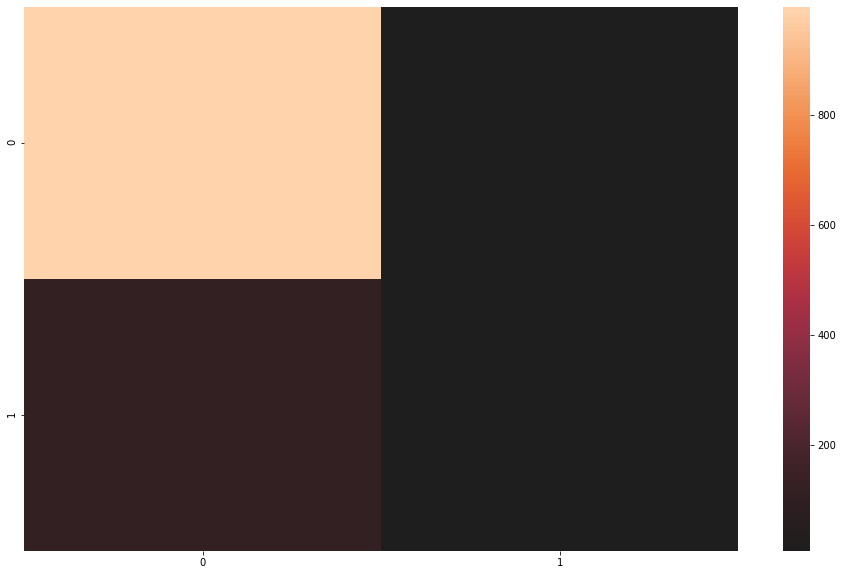

In [37]:
sns.heatmap(cm, center=True)
plt.show()